Images compression

(426, 640, 3)
(426, 640, 3)
(424, 640, 3)


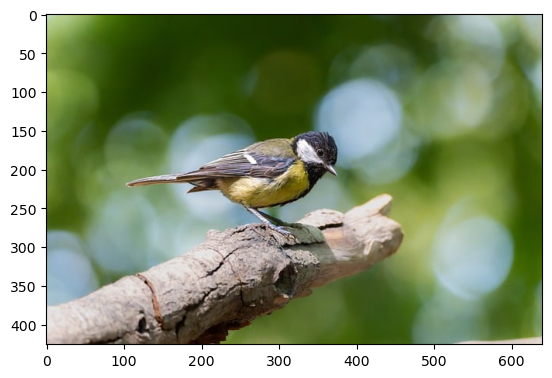

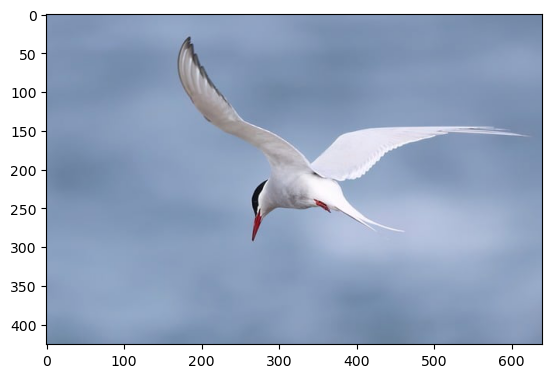

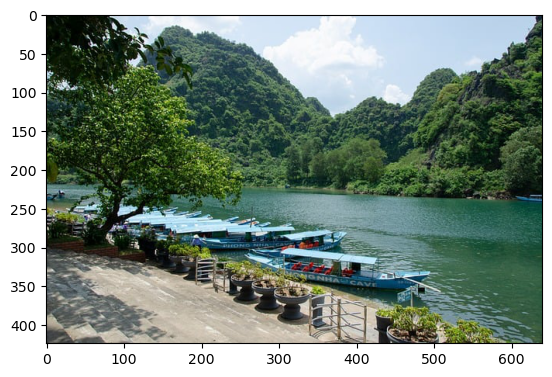

In [1]:
import pandas as pd
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt
from skimage import io
img1 = np.asarray(io.imread('images\\img1.jpg'))
img2 = np.asarray(io.imread('images\\img2.jpg'))
img3 = np.asarray(io.imread('images\\img3.jpg'))

image=face()

print(img1.shape)
print(img2.shape)
print(img3.shape)



plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()
plt.imshow(img3)
plt.show()

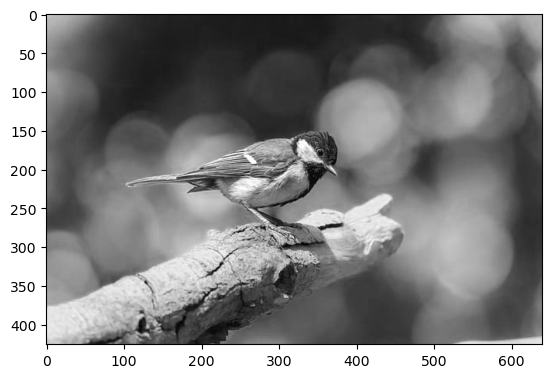

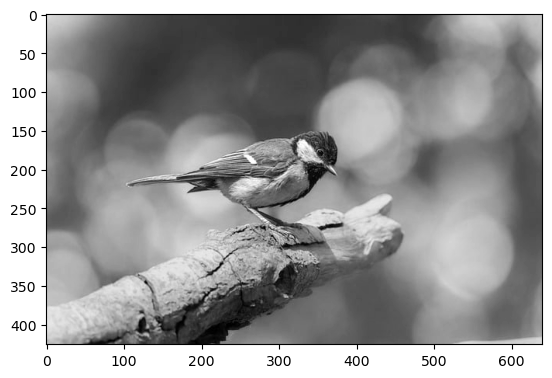

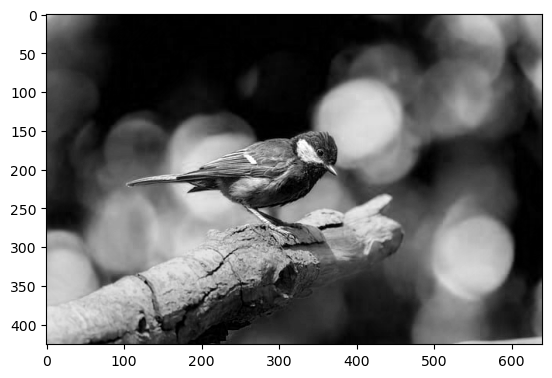

In [2]:
plt.imshow(img1[:,:,0],cmap='gray')
plt.show()
plt.imshow(img1[:,:,1],cmap='gray')
plt.show()
plt.imshow(img1[:,:,2],cmap='gray')
plt.show()

In [3]:
class PCACompression():
    def transform(image,n_components):
        compressed_data=[]
        for i in range(image.shape[2]):
            corr=np.corrcoef(image[:,:,i],rowvar=False)
            U,S,Vt=np.linalg.svd(corr)
            eigenvalues=U[:,:n_components]
            compressed=np.dot(image[:,:,i],eigenvalues)
            compressed_data.append((compressed,eigenvalues))
        return compressed_data
    def inverse_transform(compressed_data):
        image=[]
        for layer in compressed_data:
            inversed=np.dot(layer[1],layer[0].T)
            image.append(inversed)
        image = np.transpose(image, (2, 1, 0))
        return np.array(image)
    def get_commpressed_data_size(compressed_data):
        size=0
        for d in compressed_data:
            size+=d[0].size
            size+=d[1].size
        return size

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


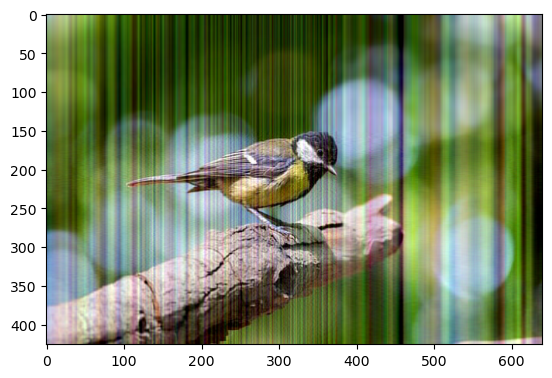

In [4]:
d100=PCACompression.transform(img1,100)
image_PCA100=PCACompression.inverse_transform(d100)/255
plt.imshow(image_PCA100)

In [5]:
d1000=PCACompression.transform(img1,300)
image_PCA1000=PCACompression.inverse_transform(d1000)/255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


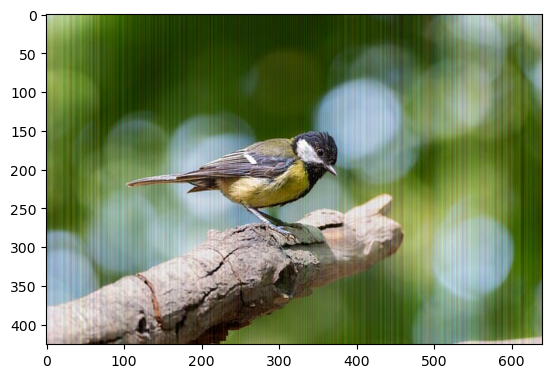

In [6]:
plt.imshow(image_PCA1000)

In [7]:
from skimage.metrics import structural_similarity, mean_squared_error
df=pd.DataFrame(columns=('compression method','image','image size','compressed data size','% compression','MSE','structural_similarity'))
df=df.append({'compression method':'PCA','image':'img1','image size':img1.size,'compressed data size':PCACompression.get_commpressed_data_size(d100),'% compression':PCACompression.get_commpressed_data_size(d100)/img1.size,'MSE':mean_squared_error(image_PCA100,img1),'structural_similarity':structural_similarity(image_PCA100,img1,channel_axis=2)},ignore_index = True)
df=df.append({'compression method':'PCA','image':'img1','image size':img1.size,'compressed data size':PCACompression.get_commpressed_data_size(d1000),'% compression':PCACompression.get_commpressed_data_size(d1000)/img1.size,'MSE':mean_squared_error(image_PCA1000,img1),'structural_similarity':structural_similarity(image_PCA1000,img1,channel_axis=2)},ignore_index = True)
df.head()

c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\235700546.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'PCA','image':'img1','image size':img1.size,'compressed data size':PCACompression.get_commpressed_data_size(d100),'% compression':PCACompression.get_commpressed_data_size(d100)/img1.size,'MSE':mean_squared_error(image_PCA100,img1),'structural_similarity':structural_similarity(image_PCA100,img1,channel_axis=2)},ignore_index = True)
c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\2357005

compression method image image size compressed data size  % compression  \
0                PCA  img1     817920               319800       0.390992   
1                PCA  img1     817920               959400       1.172975   

            MSE  structural_similarity  
0  15168.166665               0.000431  
1  15165.546025               0.000775

In [8]:

cd=PCACompression.transform(img2,100)
inversed_image=PCACompression.inverse_transform(cd)
df=df.append({'compression method':'PCA','image':'img2','image size':img2.size,'compressed data size':PCACompression.get_commpressed_data_size(cd),'% compression':PCACompression.get_commpressed_data_size(cd)/img2.size,'MSE':mean_squared_error(inversed_image,img2),'structural_similarity':structural_similarity(inversed_image,img2,channel_axis=2)},ignore_index = True)

cd=PCACompression.transform(img3,100)
inversed_image=PCACompression.inverse_transform(cd)
df=df.append({'compression method':'PCA','image':'img3','image size':img3.size,'compressed data size':PCACompression.get_commpressed_data_size(cd),'% compression':PCACompression.get_commpressed_data_size(cd)/img3.size,'MSE':mean_squared_error(inversed_image,img3),'structural_similarity':structural_similarity(inversed_image,img3,channel_axis=2)},ignore_index = True)
df.head()


c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\2528908393.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'PCA','image':'img2','image size':img2.size,'compressed data size':PCACompression.get_commpressed_data_size(cd),'% compression':PCACompression.get_commpressed_data_size(cd)/img2.size,'MSE':mean_squared_error(inversed_image,img2),'structural_similarity':structural_similarity(inversed_image,img2,channel_axis=2)},ignore_index = True)
c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\252890

compression method image image size compressed data size  % compression  \
0                PCA  img1     817920               319800       0.390992   
1                PCA  img1     817920               959400       1.172975   
2                PCA  img2     817920               319800       0.390992   
3                PCA  img3     814080               319200       0.392099   

            MSE  structural_similarity  
0  15168.166665               0.000431  
1  15165.546025               0.000775  
2    100.526340               0.158973  
3    221.788586               0.628270

In [9]:
import tensorly as tl
class CPDCompression():
    def transform(image,rank):
        image_tensor=tl.tensor(image,dtype='float64')
        compressed_data=tl.decomposition.parafac(image_tensor,rank,init='random')
        return compressed_data
    def inverse_transform(compressed_data):
        image=tl.cp_to_tensor(compressed_data)
        return np.array(image)
    def get_commpressed_data_size(compressed_data):
        size=0
        for factor in compressed_data.factors:
            size+=factor.size
        size+=compressed_data.weights.size
        return size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


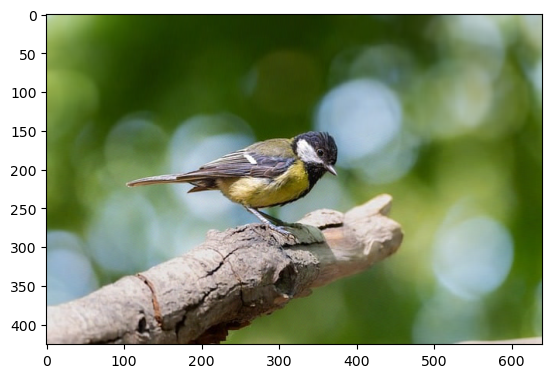

c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\4253556859.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'CPD','image':'img1','image size':img1.size,'compressed data size':CPDCompression.get_commpressed_data_size(cd),'% compression':CPDCompression.get_commpressed_data_size(cd)/img1.size,'MSE':mean_squared_error(inversed_image,img1),'structural_similarity':structural_similarity(inversed_image,img1,channel_axis=2)},ignore_index = True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


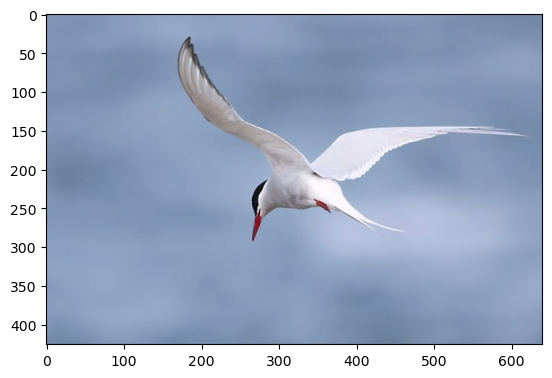

c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\4253556859.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'CPD','image':'img2','image size':img2.size,'compressed data size':CPDCompression.get_commpressed_data_size(cd),'% compression':CPDCompression.get_commpressed_data_size(cd)/img2.size,'MSE':mean_squared_error(inversed_image,img2),'structural_similarity':structural_similarity(inversed_image,img2,channel_axis=2)},ignore_index = True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


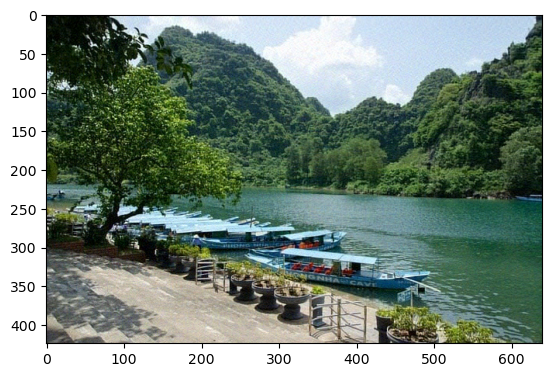

c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\4253556859.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'CPD','image':'img3','image size':img3.size,'compressed data size':CPDCompression.get_commpressed_data_size(cd),'% compression':CPDCompression.get_commpressed_data_size(cd)/img3.size,'MSE':mean_squared_error(inversed_image,img3),'structural_similarity':structural_similarity(inversed_image,img3,channel_axis=2)},ignore_index = True)


In [10]:
cd=CPDCompression.transform(img1,200)
inversed_image=CPDCompression.inverse_transform(cd)
plt.imshow(inversed_image/255)
plt.show()

df=df.append({'compression method':'CPD','image':'img1','image size':img1.size,'compressed data size':CPDCompression.get_commpressed_data_size(cd),'% compression':CPDCompression.get_commpressed_data_size(cd)/img1.size,'MSE':mean_squared_error(inversed_image,img1),'structural_similarity':structural_similarity(inversed_image,img1,channel_axis=2)},ignore_index = True)


cd=CPDCompression.transform(img2,200)
inversed_image=CPDCompression.inverse_transform(cd)
plt.imshow(inversed_image/255)
plt.show()

df=df.append({'compression method':'CPD','image':'img2','image size':img2.size,'compressed data size':CPDCompression.get_commpressed_data_size(cd),'% compression':CPDCompression.get_commpressed_data_size(cd)/img2.size,'MSE':mean_squared_error(inversed_image,img2),'structural_similarity':structural_similarity(inversed_image,img2,channel_axis=2)},ignore_index = True)

cd=CPDCompression.transform(img3,200)
inversed_image=CPDCompression.inverse_transform(cd)
plt.imshow(inversed_image/255)
plt.show()

df=df.append({'compression method':'CPD','image':'img3','image size':img3.size,'compressed data size':CPDCompression.get_commpressed_data_size(cd),'% compression':CPDCompression.get_commpressed_data_size(cd)/img3.size,'MSE':mean_squared_error(inversed_image,img3),'structural_similarity':structural_similarity(inversed_image,img3,channel_axis=2)},ignore_index = True)



In [11]:
class TuckerCompression():
    def transform(image,rank):
        image_tensor=tl.tensor(image,dtype='float64')
        compressed_data=tl.decomposition.tucker(image_tensor,rank,init='random')
        return compressed_data
    def inverse_transform(compressed_data):
        image=tl.tucker_to_tensor(compressed_data)
        return np.array(image)
    def get_commpressed_data_size(compressed_data):
        size=0
        for factor in compressed_data.factors:
            size+=factor.size
        size+=compressed_data.core.size
        return size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


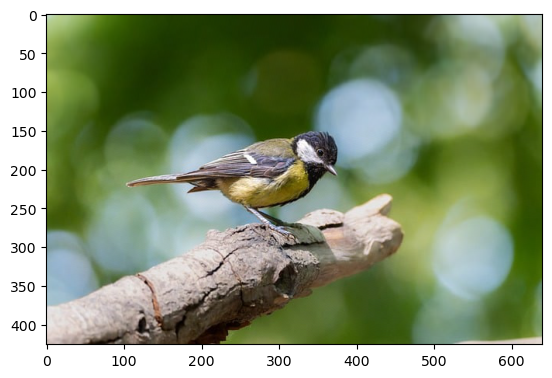

c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\3573864771.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'Tucker','image':'img1','image size':img1.size,'compressed data size':TuckerCompression.get_commpressed_data_size(cd),'% compression':TuckerCompression.get_commpressed_data_size(cd)/img1.size,'MSE':mean_squared_error(inversed_image,img1),'structural_similarity':structural_similarity(inversed_image,img1,channel_axis=2)},ignore_index = True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


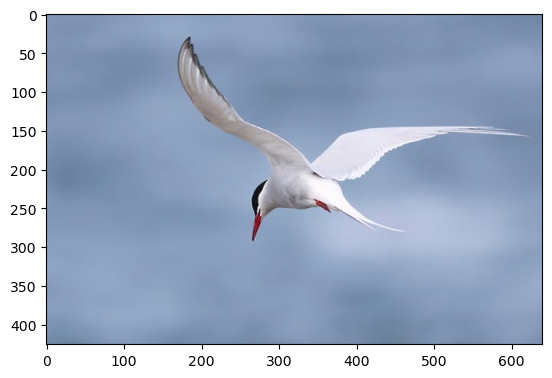

c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\3573864771.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'Tucker','image':'img2','image size':img2.size,'compressed data size':TuckerCompression.get_commpressed_data_size(cd),'% compression':TuckerCompression.get_commpressed_data_size(cd)/img2.size,'MSE':mean_squared_error(inversed_image,img2),'structural_similarity':structural_similarity(inversed_image,img2,channel_axis=2)},ignore_index = True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


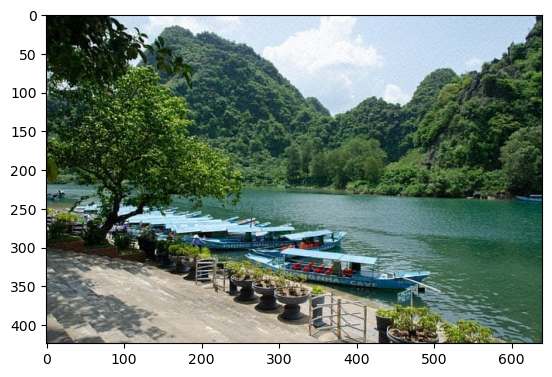

c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\3573864771.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'Tucker','image':'img3','image size':img3.size,'compressed data size':TuckerCompression.get_commpressed_data_size(cd),'% compression':TuckerCompression.get_commpressed_data_size(cd)/img3.size,'MSE':mean_squared_error(inversed_image,img3),'structural_similarity':structural_similarity(inversed_image,img3,channel_axis=2)},ignore_index = True)


In [12]:
cd=TuckerCompression.transform(img1,[200,250,3])
inversed_image=TuckerCompression.inverse_transform(cd)
plt.imshow(inversed_image/255)
plt.show()

df=df.append({'compression method':'Tucker','image':'img1','image size':img1.size,'compressed data size':TuckerCompression.get_commpressed_data_size(cd),'% compression':TuckerCompression.get_commpressed_data_size(cd)/img1.size,'MSE':mean_squared_error(inversed_image,img1),'structural_similarity':structural_similarity(inversed_image,img1,channel_axis=2)},ignore_index = True)


cd=TuckerCompression.transform(img2,[200,250,3])
inversed_image=TuckerCompression.inverse_transform(cd)
plt.imshow(inversed_image/255)
plt.show()

df=df.append({'compression method':'Tucker','image':'img2','image size':img2.size,'compressed data size':TuckerCompression.get_commpressed_data_size(cd),'% compression':TuckerCompression.get_commpressed_data_size(cd)/img2.size,'MSE':mean_squared_error(inversed_image,img2),'structural_similarity':structural_similarity(inversed_image,img2,channel_axis=2)},ignore_index = True)

cd=TuckerCompression.transform(img3,[200,250,3])
inversed_image=TuckerCompression.inverse_transform(cd)
plt.imshow(inversed_image/255)
plt.show()

df=df.append({'compression method':'Tucker','image':'img3','image size':img3.size,'compressed data size':TuckerCompression.get_commpressed_data_size(cd),'% compression':TuckerCompression.get_commpressed_data_size(cd)/img3.size,'MSE':mean_squared_error(inversed_image,img3),'structural_similarity':structural_similarity(inversed_image,img3,channel_axis=2)},ignore_index = True)


In [13]:
import pywt
import scipy.sparse as sp

class WaveletTransformCompression():

    def treshhold(coeff_array,compression_ratio):     
        Csort=np.sort(np.abs(coeff_array.reshape(-1)))
        thresh=Csort[int(np.floor((1-compression_ratio)*len(Csort)))]
        ind=np.abs(coeff_array)>thresh
        filtered_coeffs=coeff_array*ind
        
        return filtered_coeffs
    
    def to_sparsed_matrix(filtered_coeffs):
        return sp.csr_matrix(filtered_coeffs)
    
    def from_sparsed_matrix(sparsed_data):
        return sparsed_data.toarray()

    def transform(image,level,compression_ratio,wavelet='haar'):
        compressed_data=[]
        for i in range(image.shape[2]):
            coeffs=pywt.wavedec2(image[:,:,i],wavelet=wavelet,level=level)
            coeff_arr,coeff_slices=pywt.coeffs_to_array(coeffs)
            filtered_coeffs=WaveletTransformCompression.treshhold(coeff_arr,compression_ratio)
            compressed_data.append((WaveletTransformCompression.to_sparsed_matrix(filtered_coeffs),coeff_slices))
        return compressed_data
    def inverse_transform(compressed_data,wavelet='haar'):
        image=[]
        for layer in compressed_data:
            coeff_arr=WaveletTransformCompression.from_sparsed_matrix(layer[0])
            coeffs=pywt.array_to_coeffs(coeff_arr,layer[1],output_format='wavedec2')
            inversed=pywt.waverec2(coeffs,wavelet=wavelet)
            image.append(inversed)
        image = np.transpose(image, (1,2, 0))
        return np.array(image)

    def get_commpressed_data_size(compressed_data):
        size=0
        for layer in compressed_data:
            size+=layer[0].data.size
        return size

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


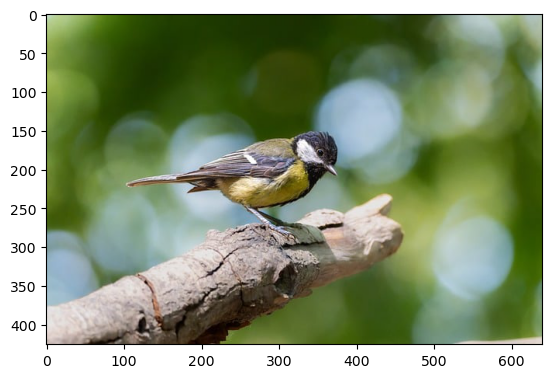

(426, 640, 3) (426, 640, 3)


c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\232888350.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'Wavelet Transform','image':'img1','image size':img1.size,'compressed data size':WaveletTransformCompression.get_commpressed_data_size(cd),'% compression':WaveletTransformCompression.get_commpressed_data_size(cd)/img1.size,'MSE':mean_squared_error(inversed_image,img1),'structural_similarity':structural_similarity(inversed_image,img1,channel_axis=2)},ignore_index = True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


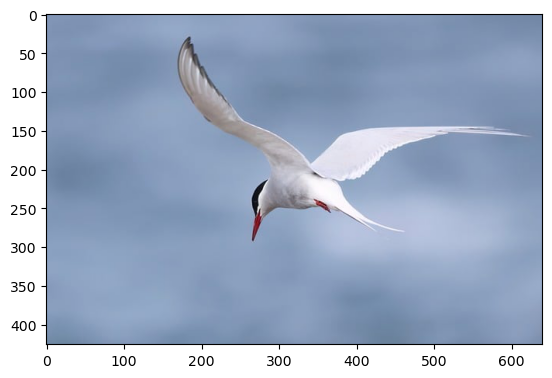

(426, 640, 3) (426, 640, 3)


c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\232888350.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'Wavelet Transform','image':'img2','image size':img2.size,'compressed data size':WaveletTransformCompression.get_commpressed_data_size(cd),'% compression':WaveletTransformCompression.get_commpressed_data_size(cd)/img2.size,'MSE':mean_squared_error(inversed_image,img2),'structural_similarity':structural_similarity(inversed_image,img2,channel_axis=2)},ignore_index = True)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


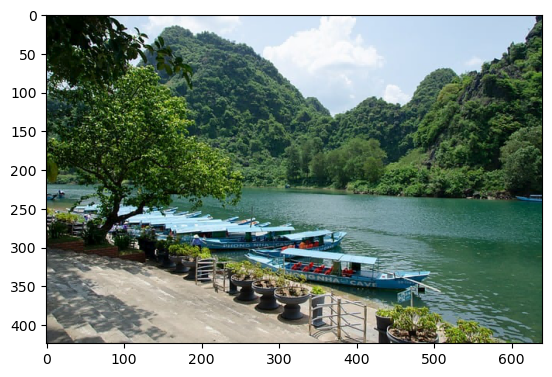

(424, 640, 3) (424, 640, 3)


c:\ProgramData\Anaconda3\lib\site-packages\skimage\_shared\utils.py:348: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  return func(*args, **kwargs)
C:\Users\jacek\AppData\Local\Temp\ipykernel_26072\232888350.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'compression method':'Wavelet Transform','image':'img3','image size':img3.size,'compressed data size':WaveletTransformCompression.get_commpressed_data_size(cd),'% compression':WaveletTransformCompression.get_commpressed_data_size(cd)/img3.size,'MSE':mean_squared_error(inversed_image,img3),'structural_similarity':structural_similarity(inversed_image,img3,channel_axis=2)},ignore_index = True)


In [14]:
cd=WaveletTransformCompression.transform(img1,1,0.5)
inversed_image=WaveletTransformCompression.inverse_transform(cd,)
plt.imshow(inversed_image/255)
plt.show()

print(img1.shape,inversed_image.shape)


df=df.append({'compression method':'Wavelet Transform','image':'img1','image size':img1.size,'compressed data size':WaveletTransformCompression.get_commpressed_data_size(cd),'% compression':WaveletTransformCompression.get_commpressed_data_size(cd)/img1.size,'MSE':mean_squared_error(inversed_image,img1),'structural_similarity':structural_similarity(inversed_image,img1,channel_axis=2)},ignore_index = True)

cd=WaveletTransformCompression.transform(img2,1,0.5)
inversed_image=WaveletTransformCompression.inverse_transform(cd,)
plt.imshow(inversed_image/255)
plt.show()

print(img2.shape,inversed_image.shape)


df=df.append({'compression method':'Wavelet Transform','image':'img2','image size':img2.size,'compressed data size':WaveletTransformCompression.get_commpressed_data_size(cd),'% compression':WaveletTransformCompression.get_commpressed_data_size(cd)/img2.size,'MSE':mean_squared_error(inversed_image,img2),'structural_similarity':structural_similarity(inversed_image,img2,channel_axis=2)},ignore_index = True)

cd=WaveletTransformCompression.transform(img3,1,0.5)
inversed_image=WaveletTransformCompression.inverse_transform(cd,)
plt.imshow(inversed_image/255)
plt.show()
print(img3.shape,inversed_image.shape)


df=df.append({'compression method':'Wavelet Transform','image':'img3','image size':img3.size,'compressed data size':WaveletTransformCompression.get_commpressed_data_size(cd),'% compression':WaveletTransformCompression.get_commpressed_data_size(cd)/img3.size,'MSE':mean_squared_error(inversed_image,img3),'structural_similarity':structural_similarity(inversed_image,img3,channel_axis=2)},ignore_index = True)



In [15]:
df

compression method image image size compressed data size  % compression  \
0                 PCA  img1     817920               319800       0.390992   
1                 PCA  img1     817920               959400       1.172975   
2                 PCA  img2     817920               319800       0.390992   
3                 PCA  img3     814080               319200       0.392099   
4                 CPD  img1     817920               214000       0.261639   
5                 CPD  img2     817920               214000       0.261639   
6                 CPD  img3     814080               213600       0.262382   
7              Tucker  img1     817920               395209       0.483188   
8              Tucker  img2     817920               395209       0.483188   
9              Tucker  img3     814080               394809       0.484976   
10  Wavelet Transform  img1     817920               405136       0.495325   
11  Wavelet Transform  img2     817920               347618       0.425002   
12  Wavelet Transform  img3     814080               406488       0.499322   

             MSE  structural_similarity  
0   1.516817e+04               0.000431  
1   1.516555e+04               0.000775  
2   1.005263e+02               0.158973  
3   2.217886e+02               0.628270  
4   2.530156e+00               0.854636  
5   2.987511e-01               0.835759  
6   5.498888e+01               0.808650  
7   6.739889e-01               0.926910  
8   5.345669e-02               0.928566  
9   4.325808e+01               0.824342  
10  1.170237e-01               0.979009  
11  2.439987e-27               1.000000  
12  8.490211e+00               0.956835